In [1]:
import itertools

import numpy as np
from qutip import *
# some_file.py
# import sys
from qudit import *
# import scipy
import time
import IPython.display as disp
# from tqdm.notebook import tqdm
# import multiprocess as mp
import matplotlib.pyplot as plt
from continuous import *


# sys.path.insert(1, 'C:\\Users\\shoha\\Documents\\GitHub\\grimsmo-paper-simulations')

# from measurements import *

%load_ext autoreload
%autoreload 2

In [ ]:
a = 4
N = 60
d = 4
base_state_list = [sum([basis(N, d*i+j) for i in range(int(N/d))]).unit() for j in range(d)]
qudit = BosonicQudit(N,d, base_state_list=base_state_list)
sigma_dit = qudit.cavity_to_qudit(ket2dm(coherent(N,a)+coherent(N,-a)))
sigma_bit = qudit.qudit_to_qubit(sigma_dit)
display(sigma_bit)

In [ ]:
a = 4
N = 30
d = 4
base_state_list = [sum([basis(N, d*i+j) for i in range(int(N/d))]).unit() for j in range(d)]
entQudit = EntangledBosonicQudit(N,d, base_state_list=base_state_list, res=20)
sigma_dit = entQudit.cavity_to_entangled_qudits(ket2dm(tensor(coherent(N,a)+coherent(N,-a), coherent(N,a)+coherent(N,-a) )))
sigma_dit

In [32]:
N = 100
proObj = ContinuousProtocol(coherent(N,4),res=16,m_i=16, m_c=8)

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

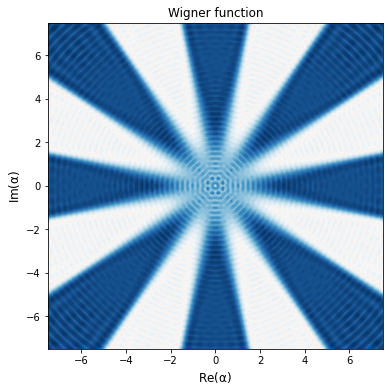

In [33]:
plot_wigner(proObj._create_phase_parity_measurement(0))

In [35]:
np.array(proObj._create_photon_parity_measurement(1))

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [31]:
range(0, 100, 2//2)

range(0, 100)

In [77]:
N = 1000
u = 0.1
sup = qt.Qobj(np.diag(np.array([np.exp(-u / 2 * (m - n) ** 2) for m in range(N) for n in range(N)])),
                       dims=[[[N], [N]], [[N], [N]]])

In [21]:
import scipy.sparse as sp
N = 1000
u = 0.1

diagonal_elements = np.array([np.exp(-u / 2 * (m - n) ** 2) for m in range(N) for n in range(N)])
# Create a sparse diagonal matrix
sparse_matrix = sp.diags(diagonal_elements, format="csr")

# Create the sparse superoperator as a Qobj
superoperator = qt.Qobj(sparse_matrix, dims=[[[N], [N]], [[N], [N]]])

In [6]:
N = 1000
gamma = 0.1
NoiseChannels.get_dephasing_channel(N,gamma)(ket2dm(coherent(N,1)))

Quantum object: dims = [[1000], [1000]], shape = (1000, 1000), type = oper, isherm = True
Qobj data =
[[0.36787944 0.34993775 0.21297647 ... 0.         0.         0.        ]
 [0.34993775 0.36787944 0.24744336 ... 0.         0.         0.        ]
 [0.21297647 0.24744336 0.18393972 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

In [17]:
import sys
# display(sys.getsizeof(np.diag(np.array([np.exp(-u / 2 * (m - n) ** 2) for m in range(N) for n in range(N)]))))
display(sys.getsizeof(superoperator))

from pympler import asizeof

size_in_bytes = asizeof.asizeof(superoperator)
print(f"Size of the superoperator in bytes: {size_in_bytes}")
print(asizeof.asized(superoperator, detail=2).format())

48

Size of the superoperator in bytes: 8566976
Quantum object: dims = [[1000000], [10....24500714+0j)
  (999999, 999999)	(1+0j) size=8566976 flat=48
    __dict__ size=8566928 flat=360
        [V] _data: <1000000x1000000 sparse matrix of type....ments in Compressed Sparse Row format> size=8566000 flat=48
        [V] dims: [[1000000], [1000000]] size=200 flat=72
        [K] superrep size=64 flat=64
        [K] _isunitary size=64 flat=64
        [K] _isherm size=56 flat=56
        [K] _type size=56 flat=56
        [K] _data size=56 flat=56
        [K] dims size=56 flat=56
        [V] _isherm: None size=16 flat=16
        [V] _type: None size=0 flat=0
        [V] superrep: None size=0 flat=0
        [V] _isunitary: None size=0 flat=0
    __class__ size=0 flat=0


In [42]:
ket2dm(coherent(N,1))

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [3.67879441e-01 3.67879441e-01 2.60130047e-01 1.50186155e-01
  7.50930613e-02 3.35827506e-02 1.37094277e-02 5.18515195e-03
  1.81760459e-03 6.67227779e-04]
 [2.60130047e-01 2.60130047e-01 1.83939720e-01 1.06197648e-01
  5.30988128e-02 2.37465906e-02 9.69402930e-03 3.66645610e-03
  1.28524053e-03 4.71801286e-04]
 [1.50186155e-01 1.50186155e-01 1.06197648e-01 6.13132417e-02
  3.06566143e-02 1.37101007e-02 5.59685050e-03 2.11682944e-03
  7.42033975e-04 2.72394603e-04]
 [7.50930613e-02 7.50930613e-02 5.30988128e-02 3.06566143e-02
  1.53283038e-02 6.85504886e-03 2.79842465e-03 1.05841449e-03
  3.71016908e-04 1.36197272e-04]
 [3.35827506e-02 3.35827506e-02 2.37465906e-02 1.37101007e-02
  6.85504886e-03 3.06568133e-03 1.25149775e-03 4.73338939e-

In [36]:
X = sigmax()
sup = to_super(X)

In [35]:
sup(sigmaz())

NameError: name 'sup' is not defined

In [38]:
np.array(sup) @ np.array([1,0, 0,1])

array([1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [7]:
|sup

NameError: name 'sup' is not defined

In [11]:
num(100).expm(method="sparse")

Quantum object: dims = [[100], [100]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.71828183e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.38905610e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.33833472e+42
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.63797095e+42 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.88903032e+42]]

In [14]:
import time
a = time.time()
for i in range(1000):
    num(100).expm(method="sparse")
print(time.time()-a)
a = time.time()
for i in range(1000):
    num(100).expm(method="dense")
print(time.time()-a)

0.5910005569458008
0.6170036792755127


In [33]:
import time
a = time.time()
for i in range(100):
    qt.Qobj(np.diag( np.e ** num(100).diag()))
print(time.time()-a)
a = time.time()
for i in range(100):
    qt.Qobj(sp.diags( np.e ** num(100).diag()))
print(time.time()-a)

0.09600210189819336
0.07200074195861816


In [39]:
a = qt.Qobj(sp.diags( np.e ** num(100).diag())).unit(sparse=False)
b = num(100).expm(method="sparse").unit(sparse=False)
np.testing.assert_almost_equal(fidelity(a,b),1)

AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 0.999999168471281
 DESIRED: 1

In [60]:
NoiseChannels.get_loss_kraus(12, 0.1, 5)
# a.dims = [100,100]

Quantum object: dims = [[12], [12]], shape = (12, 12), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.00316228
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00734847 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.01304224 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.02020495 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.02875215 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.03857505 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.0495

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

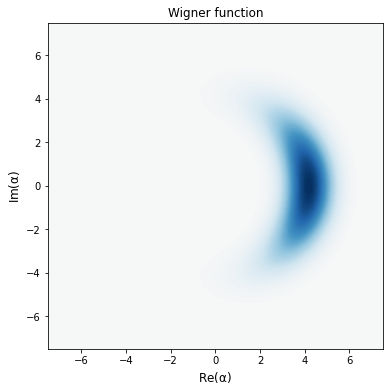

In [65]:
deph_super = NoiseChannels.get_dephasing_channel(100,0.3)
plot_wigner(deph_super(coherent_dm(100, 3)))

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

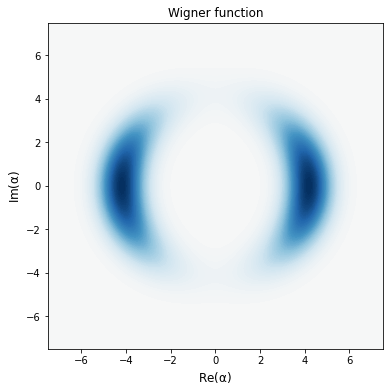

In [68]:
deph_super = NoiseChannels.get_dephasing_channel(100,0.3)
deph_tensor = super_tensor(deph_super, deph_super)
plot_wigner(deph_tensor(tensor(coherent_dm(100, 3),coherent_dm(100, 3))+tensor(coherent_dm(100, -3),coherent_dm(100, -3))).ptrace(1))

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

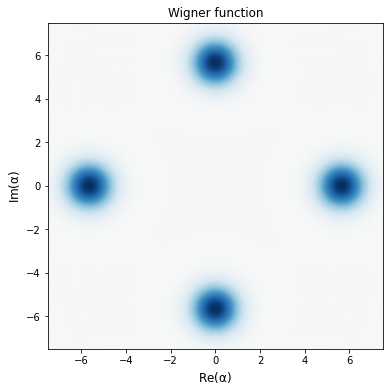

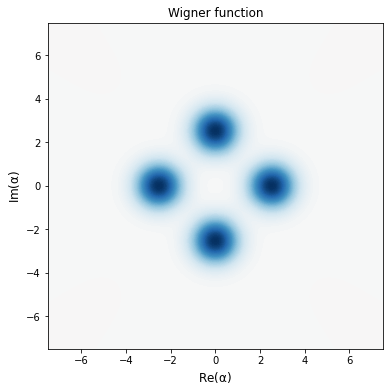

In [82]:
N = 50
proObj = ContinuousProtocol(coherent(N,4),res=16,m_i=4, m_c=8)
state = proObj._create_initial_state()
plot_wigner(state.ptrace(0))
plot_wigner(proObj._add_noise(state,0.8,0, max_loss_level=10).ptrace(1))

In [86]:
fidelity(proObj._add_noise(state,0.8,0, max_loss_level=10).ptrace(1).unit(),proObj._add_noise(state,0.8,0, max_loss_level=30).ptrace(1).unit())

0.9979541148436717

In [2]:
N = 200
proObj = ContinuousProtocol(coherent(N,4),res=16,m_i=4, m_c=4)
proObj.simulate_fidelity_specific(0,0,0,0,0.01,0.01, decode_res=16)

KeyboardInterrupt: 

In [103]:
tt = proObj.test
tt.dims = [[2,2,2,2],[2,2,2,2]]
tt.ptrace([0,2]).full()

array([[0.47423197+0.j, 0.        +0.j, 0.        +0.j, 0.4749295 +0.j],
       [0.        +0.j, 0.02434357+0.j, 0.02430648+0.j, 0.        +0.j],
       [0.        +0.j, 0.02430648+0.j, 0.02434357+0.j, 0.        +0.j],
       [0.4749295 +0.j, 0.        +0.j, 0.        +0.j, 0.47708088+0.j]])

In [104]:
np.trace(proObj.test.unit() ** 2)

(0.9059850157028233+0j)

In [105]:
phi_p = (tensor(basis(2,0),basis(2,0)) + tensor(basis(2,1),basis(2,1))).unit()
(fidelity(tt.ptrace([0,2]),phi_p)) ** 2

0.950585924680055

In [81]:
four_cat0 = sum([coherent(N, 4*np.e ** (1j*i*np.pi/2)) for i in range(4)])
four_cat1 = sum([( (-1) ** i) * coherent(N, 4*np.e ** (1j*i*np.pi/2)) for i in range(4)])
ent_four_cat = ket2dm(tensor(four_cat0,four_cat0) + tensor(four_cat1,four_cat1)).unit()
new = proObj.BosonicObject.cavity_to_entangled_qudits(ent_four_cat)

In [82]:
new.dims = [[2,2,2,2],[2,2,2,2]]
new.ptrace([0,2]).full()

array([[0.46006365+0.j, 0.        +0.j, 0.        +0.j, 0.49840239+0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.49840239+0.j, 0.        +0.j, 0.        +0.j, 0.53993635+0.j]])

In [75]:
new.full()

array([[0.46006366+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.49840241+0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.   

In [ ]:
plot_fock_distribution

In [69]:
n = 7
N = 2**n
proObj = ContinuousProtocol(coherent(N,4),res=16,m_i=4, m_c=4)
proObj.simulate_fidelity_specific(0,0,0,0,gamma_loss=0.01, gamma_dephasing=0.01, decode_res=16)

s_B=0


KeyboardInterrupt: 

In [4]:
n=7
q = proObj.final.unit()
q.dims = [[2]*2*n]*2
q.ptrace([n-2,2*n-2]).full()

array([[0.47637481+0.j, 0.        +0.j, 0.        +0.j, 0.45819504+0.j],
       [0.        +0.j, 0.0243436 +0.j, 0.02345002+0.j, 0.        +0.j],
       [0.        +0.j, 0.02345002+0.j, 0.0243436 +0.j, 0.        +0.j],
       [0.45819504+0.j, 0.        +0.j, 0.        +0.j, 0.47493583+0.j]])

In [5]:
phi_p = (tensor(basis(2,0),basis(2,0)) + tensor(basis(2,1),basis(2,1))).unit()
print("photon number trace out fidelity:")
(fidelity(q.ptrace([n-2,2*n-2]),phi_p)) ** 2

0.9338503590184417

In [14]:
phi_p = (tensor(basis(2,0),basis(2,0)) + tensor(basis(2,1),basis(2,1))).unit()
print("angular trace out fidelity:")
what = proObj.BosonicObject.cavity_to_entangled_qudits(proObj.final.unit()).unit()
tt = what
tt.dims = [[2,2,2,2],[2,2,2,2]]
(fidelity(tt.ptrace([0,2]),phi_p)) ** 2

angular trace out fidelity:


0.9506043269932848

In [118]:
np.trace(proObj.final)

(0.2141804066636239+0j)

In [13]:
tt = what
tt.dims = [[2,2,2,2],[2,2,2,2]]
tt.ptrace([0,2]).full()

array([[0.47624588+0.j, 0.        +0.j, 0.        +0.j, 0.47494797+0.j],
       [0.        +0.j, 0.02434366+0.j, 0.02430742+0.j, 0.        +0.j],
       [0.        +0.j, 0.02430742+0.j, 0.02434366+0.j, 0.        +0.j],
       [0.47494797+0.j, 0.        +0.j, 0.        +0.j, 0.4750668 +0.j]])

In [25]:
n = 7
N = 2**n
proObj = ContinuousProtocol(coherent(N,4),res=16,m_i=8, m_c=8)
proObj.simulate_fidelity_specific(0,0,0,0,gamma_loss=0.03, gamma_dephasing=0.03, decode_res=16)

start
state creation time: 0.0
state noise time: 18.616107940673828
s_B=0
operator creation time: 1.2941358089447021
before rotation
matrix multiplication time: 7.140427112579346


KeyboardInterrupt: 

In [ ]:
psi_p = (tensor(basis(2,1),basis(2,0)) + tensor(basis(2,0),basis(2,1))).unit()
phi_p = (tensor(basis(2,0),basis(2,0)) + tensor(basis(2,1),basis(2,1))).unit()
tt = proObj.decoded_qudit
tt.dims = [[2]*int(2*np.log2(proObj.m_c))]*2
# print(tt.full())
print(tt.ptrace([0,3]).full())
print(fidelity(tt.ptrace([0,3]),phi_p)**2)
print(fidelity(tt.ptrace([0,3]),psi_p)**2)

In [23]:
from discrete_simulation import *
d = 16
m_i = 8
m_c = 8
m_f = 2
fidelity_cut = 0
A_1,B_1,A_2,B_2 = 0,0,1,0

alpha=4

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )
simulation16.enQudit.fidelity_specific(gamma_loss_A=0.01, gamma_dephasing_A=0.05, A_1=A_1,
                                                 B_1=B_1, A_2=A_2, B_2=B_2,
                                                 m_i=m_i, m_c=m_c, m_f=m_f,
                                                 alpha=alpha)

0.9734655046977606

In [57]:
np.set_printoptions(threshold=np.inf, linewidth=200)


In [13]:
tt_cpu.ptrace([0,3])

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', isherm=True
Qobj data =
[[ 3.76497676e-03 -9.45570308e-17 -9.52830525e-17  3.22819367e-03]
 [-9.45570308e-17  4.92997756e-01  4.17391160e-01 -9.15097052e-17]
 [-9.52830525e-17  4.17391160e-01  4.99310000e-01 -9.21802115e-17]
 [ 3.22819367e-03 -9.15097052e-17 -9.21802115e-17  3.92726738e-03]]

In [14]:
tt.ptrace([0,3])

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', isherm=True
Qobj data =
[[ 3.71610002e-03 -8.95055584e-17 -8.94932157e-17  3.37938587e-03]
 [-8.95055584e-17  4.96181653e-01  4.36509799e-01 -8.76116437e-17]
 [-8.94932157e-17  4.36509799e-01  4.96116858e-01 -8.77284040e-17]
 [ 3.37938587e-03 -8.76116437e-17 -8.77284040e-17  3.98538889e-03]]

In [7]:
proObjCPU = proObj

In [9]:
tt_cpu = tt

In [16]:
proObj.N

64

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

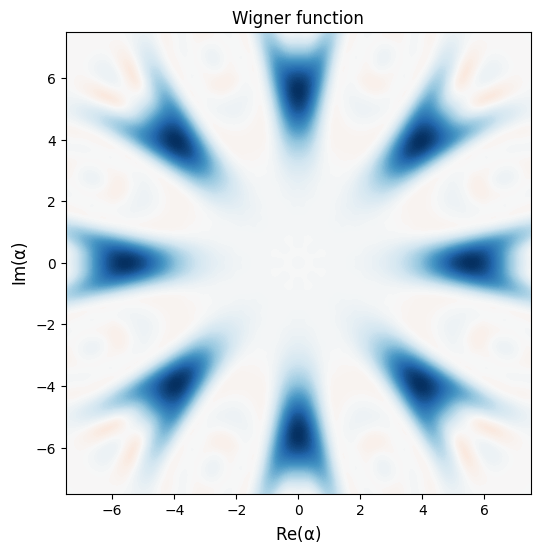

In [14]:
plot_wigner(proObj.state_after_meas.ptrace(0))

In [5]:
tt

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [9]:
np.trace(proObj.decoded_qudit)

0j

In [13]:
proObj.state_after_meas

Quantum object: dims = [[64, 64], [64, 64]], shape = (4096, 4096), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

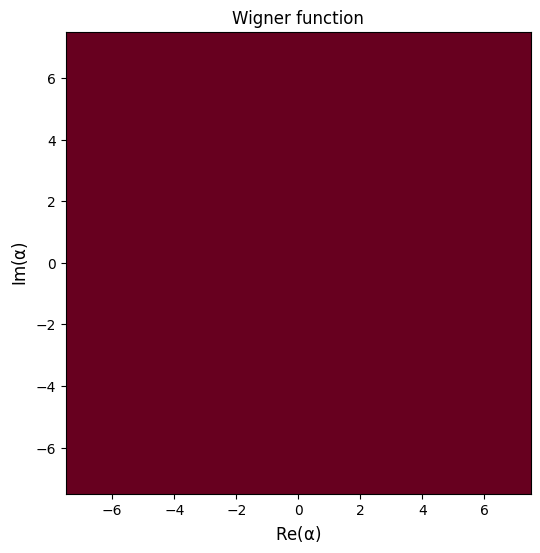

In [12]:
plot_wigner(proObj.state_after_meas.ptrace(0))

In [7]:
np.set_printoptions(threshold=np.inf)

# M = proObj._create_photon_parity_measurement(0)

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

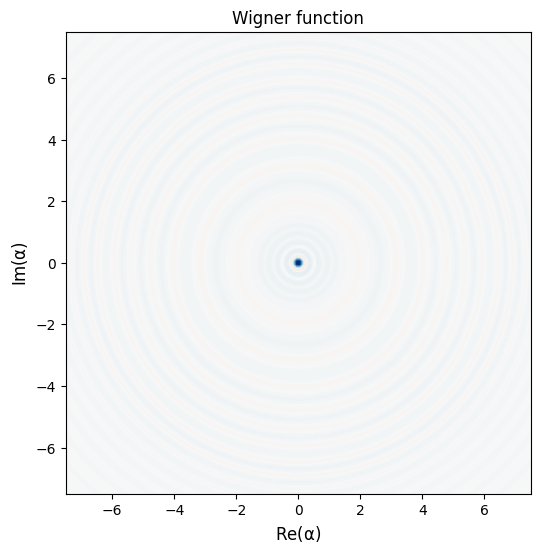

In [4]:
plot_wigner(proObj._create_photon_parity_measurement(0))

In [4]:
M = proObj._create_photon_parity_measurement(0)
a = tensor(M,M) * proObj.noisy_state * tensor(M,M).dag()

In [ ]:
M.shape

In [27]:
proObj.noisy_state.shape

(4096, 4096)

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

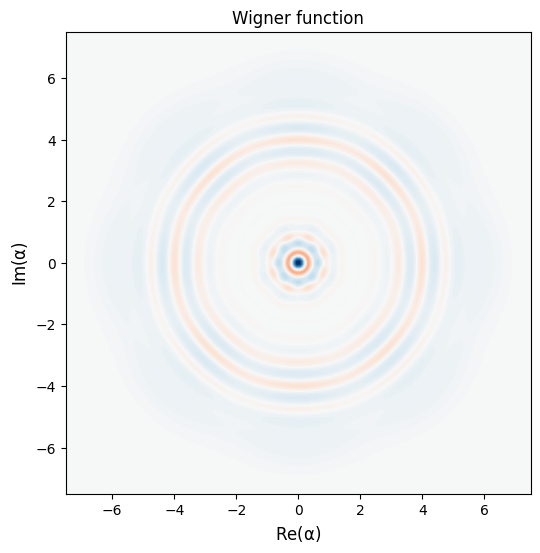

In [10]:
plot_wigner(a.ptrace(0))